In [1]:
!pip install yfinance
import yfinance as yf

# Download 5 years of Tesla stock data
data = yf.download("TSLA", start="2018-01-01", end="2025-11-01")
data.head()


/tmp/ipython-input-2863813870.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start="2018-01-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000


In [2]:
# Check for missing values present in the dataset
data.isnull().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [3]:
data.reset_index(inplace=True)


In [4]:
# Show column names
print(data.columns)

# Show data types
print(data.dtypes)

data.head()


MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Price   Ticker
Date              datetime64[ns]
Close   TSLA             float64
High    TSLA             float64
Low     TSLA             float64
Open    TSLA             float64
Volume  TSLA               int64
dtype: object


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
1,2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2,2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
3,2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
4,2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data.columns = ['Date', 'Close_TSLA', 'High_TSLA', 'Low_TSLA', 'Open_TSLA', 'Volume_TSLA']

# Ensure Date is datetime
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'])

# Check
print(data.columns.tolist())
print(data.head())


['Date', 'Close_TSLA', 'High_TSLA', 'Low_TSLA', 'Open_TSLA', 'Volume_TSLA']
        Date  Close_TSLA  High_TSLA   Low_TSLA  Open_TSLA  Volume_TSLA
0 2018-01-02   21.368668  21.474001  20.733334  20.799999     65283000
1 2018-01-03   21.150000  21.683332  21.036667  21.400000     67822500
2 2018-01-04   20.974667  21.236668  20.378668  20.858000    149194500
3 2018-01-05   21.105333  21.149332  20.799999  21.108000     68868000
4 2018-01-08   22.427334  22.468000  21.033333  21.066668    147891000


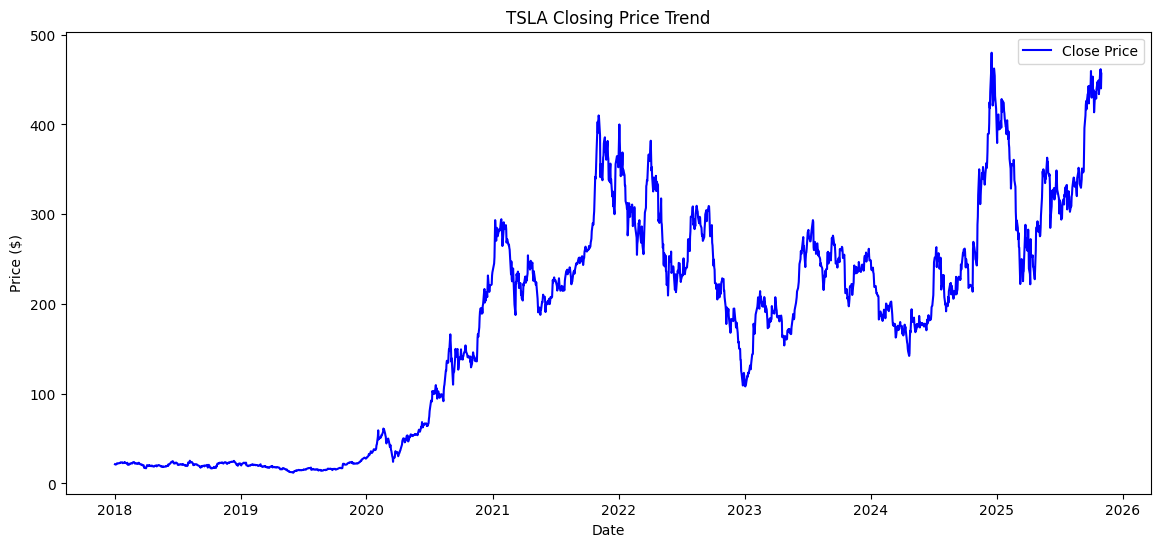

In [18]:
# Plot 1: Tesla Closing Price Trend

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close_TSLA'], color='blue', label='Close Price')
plt.title('TSLA Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


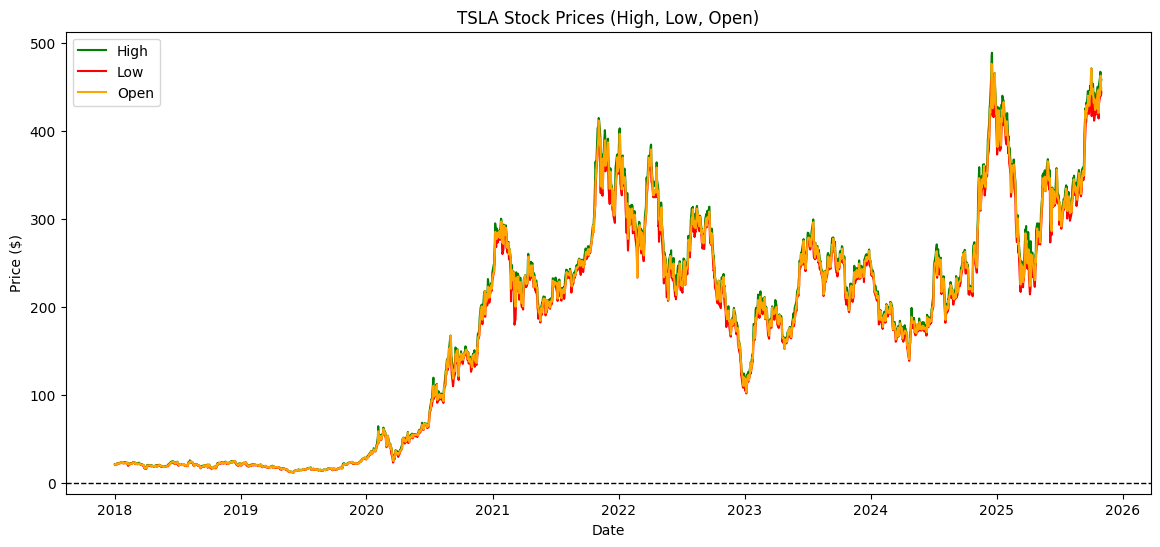

In [19]:
# Plot 2: High, Low, Open Prices Trend

plt.figure(figsize=(14,6))

# Plot each price
plt.plot(data['Date'], data['High_TSLA'], label='High', color='green')
plt.plot(data['Date'], data['Low_TSLA'], label='Low', color='red')
plt.plot(data['Date'], data['Open_TSLA'], label='Open', color='orange')

# Horizontal reference line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('TSLA Stock Prices (High, Low, Open)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


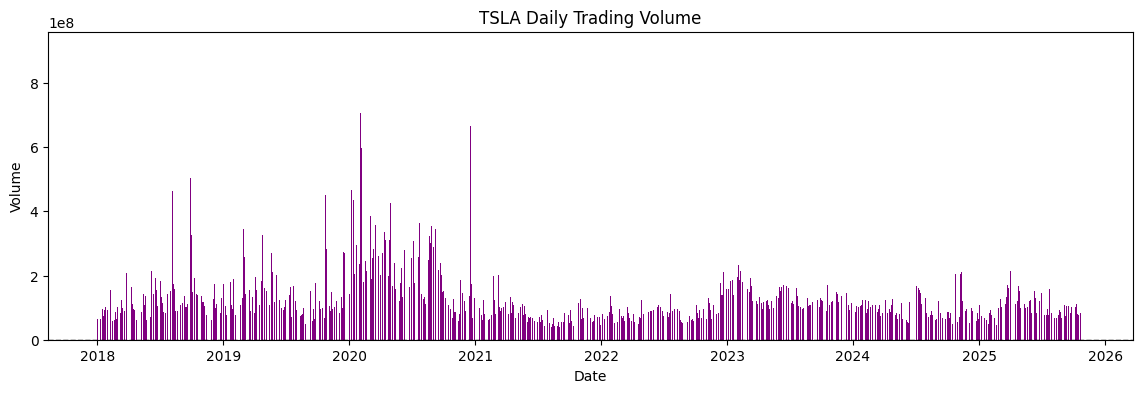

In [20]:
# Plot 3: Daily Trading Value Trend

plt.figure(figsize=(14,4))

# Plot daily volume as bars
plt.bar(data['Date'], data['Volume_TSLA'], color='purple')

# Horizontal reference line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('TSLA Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


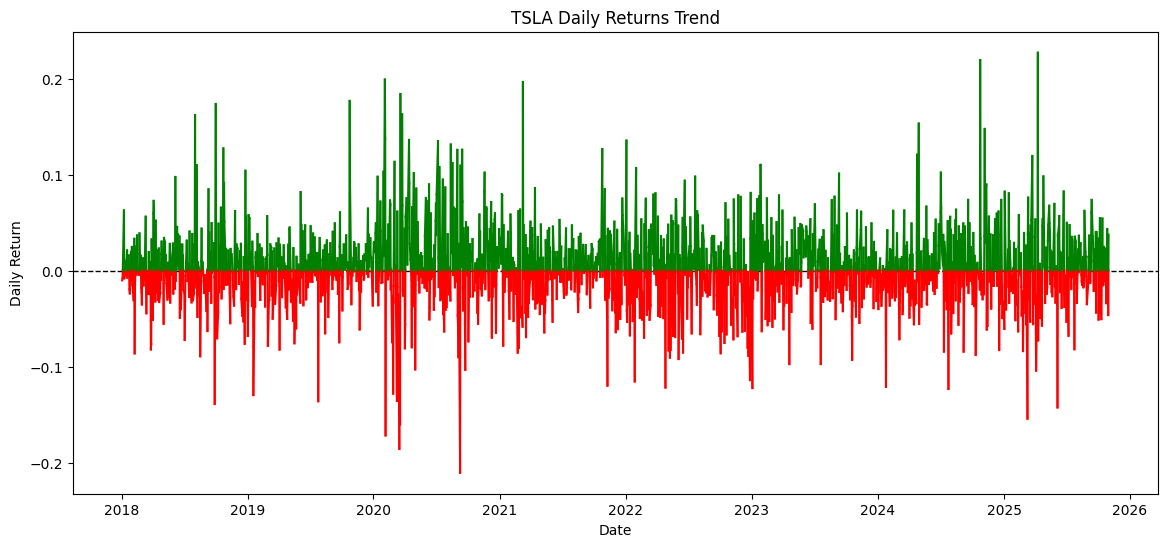

In [24]:
# Plot 4: TSLA Daily Returns Trend

import numpy as np

plt.figure(figsize=(14,6))
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # zero line

dates = data['Date'].values
returns = data['Daily_Return'].values

# loop through segments
for i in range(len(returns)-1):
    # get start and end of the segment
    x = dates[i:i+2]
    y = returns[i:i+2]

    # if the segment crosses 0, split it
    if y[0]*y[1] < 0:  # different signs
        # compute crossing point
        zero_cross = x[0] + (x[1]-x[0]) * (0 - y[0]) / (y[1]-y[0])
        # split into two segments
        plt.plot([x[0], zero_cross], [y[0], 0], color='green' if y[0]>0 else 'red')
        plt.plot([zero_cross, x[1]], [0, y[1]], color='green' if y[1]>0 else 'red')
    else:
        plt.plot(x, y, color='green' if y[0]>=0 else 'red')

plt.title('TSLA Daily Returns Trend')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()



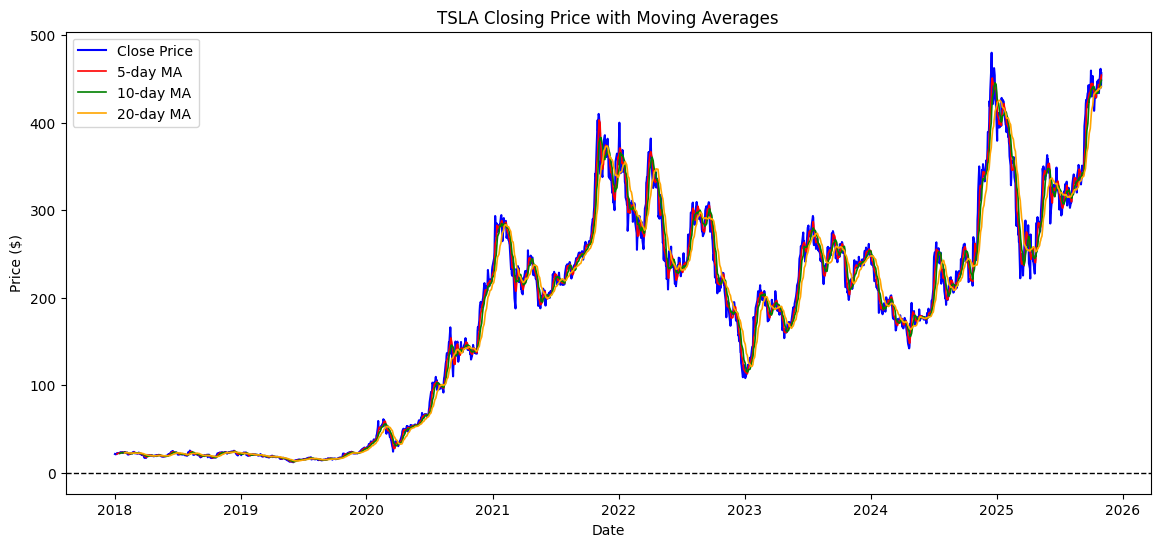

In [25]:
# Plot 5: TSLA Closing Prices with Moving Averages

plt.figure(figsize=(14,6))

# Horizontal reference line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Plot closing price
plt.plot(data['Date'], data['Close_TSLA'], label='Close Price', color='blue', linewidth=1.5)

# Plot moving averages
plt.plot(data['Date'], data['MA_5'], label='5-day MA', color='red', linewidth=1.2)
plt.plot(data['Date'], data['MA_10'], label='10-day MA', color='green', linewidth=1.2)
plt.plot(data['Date'], data['MA_20'], label='20-day MA', color='orange', linewidth=1.2)

plt.title('TSLA Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [26]:
# Lag features
for lag in range(1, 6):  # 1 to 5 days
    data[f'Close_lag_{lag}'] = data['Close_TSLA'].shift(lag)


In [27]:
from sklearn.model_selection import train_test_split

# Drop rows with NaNs
data_ml = data.dropna()

# Features & target
X = data_ml[['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4', 'Close_lag_5',
             'MA_5', 'MA_10', 'MA_20', 'Daily_Return', 'Volume_TSLA']]
y = data_ml['Close_TSLA']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # manually compute RMSE
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, R2: {r2:.2f}')


RMSE: 18.08, R2: 0.95


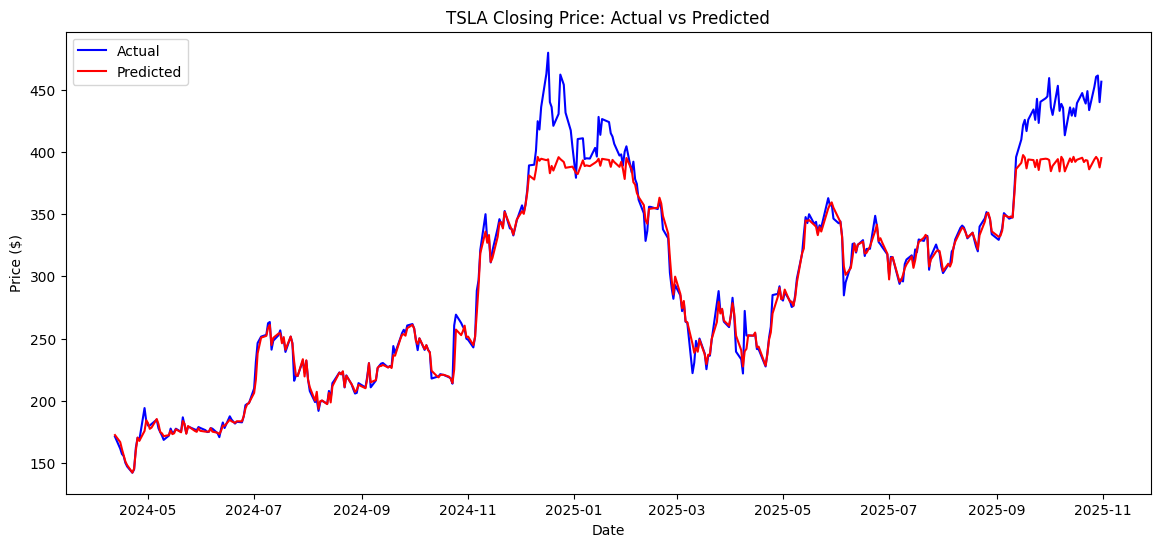

In [30]:
plt.figure(figsize=(14,6))
plt.plot(data_ml['Date'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(data_ml['Date'].iloc[-len(y_test):], y_pred, label='Predicted', color='red')
plt.title('TSLA Closing Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


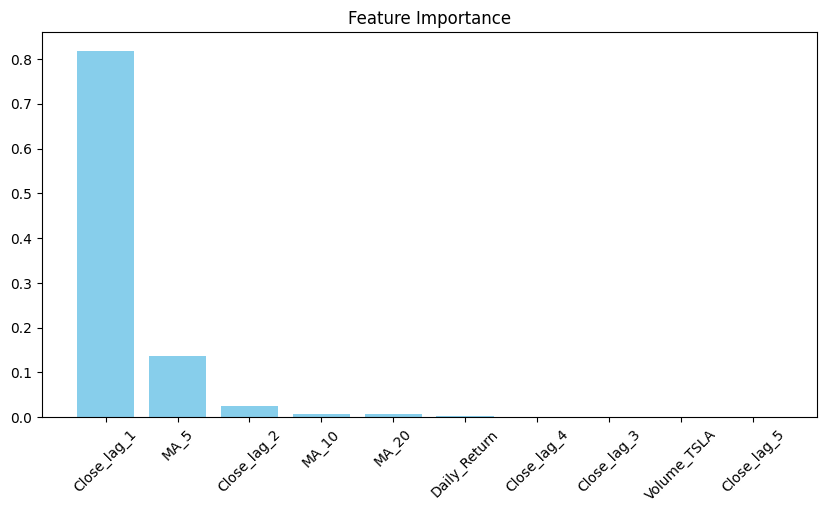

In [31]:
import matplotlib.pyplot as plt

# For Random Forest
importances = model.feature_importances_
features = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices], color="skyblue")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

# Predict with best model
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f'Tuned RMSE: {rmse_best:.2f}, R2: {r2_best:.2f}')


Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RMSE: 21.46, R2: 0.94


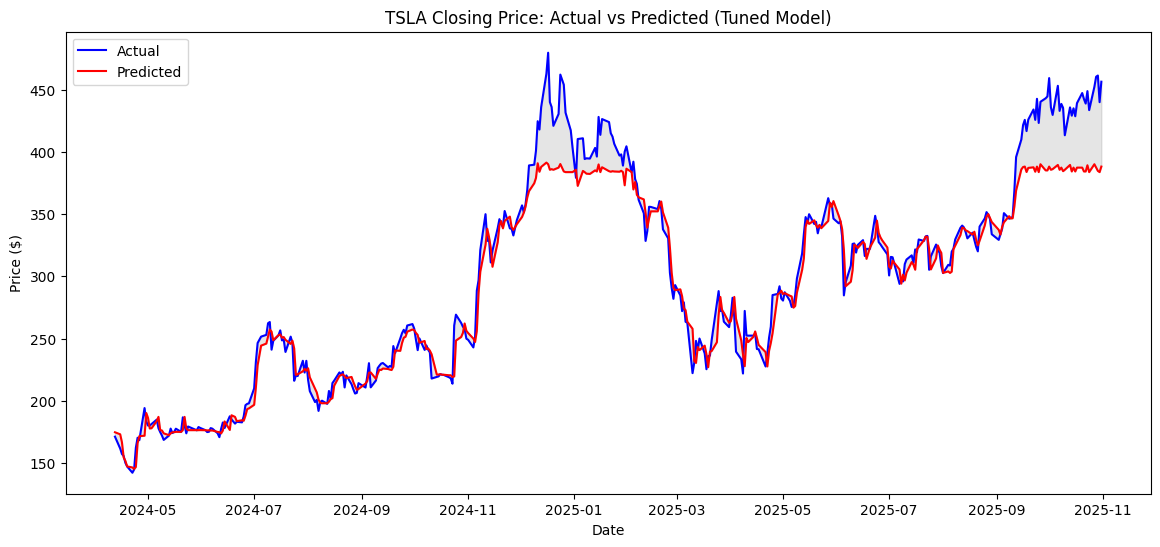

In [34]:
plt.figure(figsize=(14,6))
plt.plot(data_ml['Date'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(data_ml['Date'].iloc[-len(y_test):], y_pred_best, label='Predicted', color='red')
plt.fill_between(data_ml['Date'].iloc[-len(y_test):], y_test, y_pred_best, color='gray', alpha=0.2)
plt.title('TSLA Closing Price: Actual vs Predicted (Tuned Model)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
